In [1]:
import sqlite3
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from tqdm import tqdm
from sklearn.neighbors import KDTree
from sklearn.metrics import plot_confusion_matrix
import random
from sklearn.metrics import roc_curve,auc

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from scipy.stats import uniform
from scipy.sparse import csr_matrix

In [4]:
conn = sqlite3.connect("../amazon-fine-food-review/final_2.sqlite")
d_f = pd.read_sql_query("SELECT * FROM Reviews",conn)
d_f.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text,Cleaned_Summary
0,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...,product available victor traps unreal course t...,thirty bucks
1,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...,used victor fly bait seasons not beat great pr...,Flies Begone


In [26]:
d_f["Cleaned_text"][0]

'product available victor traps unreal course total fly genocide pretty stinky right nearby'

In [27]:
#### BOW vectorisation
model = CountVectorizer(stop_words = 'english')
BOW_1500d = model.fit_transform(d_f["Cleaned_text"])
BOW_1500d.shape

(4986, 12783)

In [28]:
x = BOW_1500d
y = d_f["Score"]
x_train, x_test , y_train ,y_test = model_selection.train_test_split(x,y,test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3490, 12783)
(1496, 12783)
(3490,)
(1496,)


0.925164792555254 f1_score is
150 predicted -
1346 predicted +
263 original -
1233 original +
accuracy =  87.09893048128342


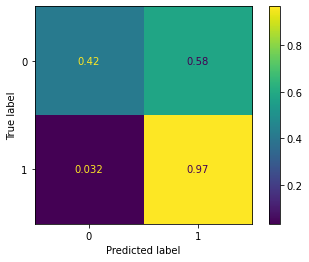

In [29]:
##### applying logistic regression on on BOW_1500d and c=1
model = LogisticRegression( penalty = 'l2' , max_iter = 1000 , random_state = 4 , C=1.0)
model.fit(x_train , y_train)
predicted_y = model.predict(x_test)
f1 = f1_score(y_test,predicted_y)
print(f1,"f1_score is")
plot_confusion_matrix(model,x_test,y_test , normalize = 'true' , labels = (0,1))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")
print("accuracy = ",accuracy_score(y_test , predicted_y , normalize = True)*100)

0.9275136399064692 f1_score is
163 predicted -
1333 predicted +
263 original -
1233 original +
accuracy =  87.56684491978609


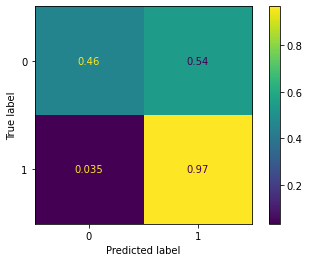

In [31]:
##### applying logistic regression on on BOW_1500d and c=1 score = liblinear and c = 1 penalty ='l1'
model = LogisticRegression( penalty = 'l1' , max_iter = 1000 , random_state = 4 , C=1 , solver = 'liblinear')
model.fit(x_train , y_train)
predicted_y = model.predict(x_test)
f1 = f1_score(y_test,predicted_y)
print(f1,"f1_score is")
plot_confusion_matrix(model,x_test,y_test , normalize = 'true' , labels = (0,1))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")
print("accuracy = ",accuracy_score(y_test , predicted_y , normalize = True)*100)

0.9205087440381557 f1_score is
243 predicted -
1253 predicted +
233 original -
1263 original +


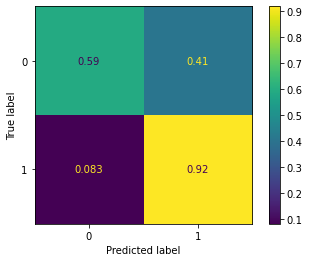

In [15]:
##### applying logistic regression on on BOW_1500d and c=1 score = liblinear and c = 1 penalty ='l2'
model = LogisticRegression( penalty = 'l1' , max_iter = 1000 , random_state = 4 , C=100 , solver = 'liblinear')
model.fit(x_train , y_train)
predicted_y = model.predict(x_test)
f1 = f1_score(y_test,predicted_y)
print(f1,"f1_score is")
plot_confusion_matrix(model,x_test,y_test , normalize = 'true' , labels = (0,1))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")

In [32]:
#### tfidf_vectorisation
tfidf  = TfidfVectorizer( min_df = 10 ,max_features = 1500)
tfidf_vector = tfidf.fit_transform(d_f["Cleaned_text"])
print("the shape of tfidf vector is", tfidf_vector.shape)
x = tfidf_vector
y = d_f["Score"]
x_train,x_test,y_test,y_test = model_selection.train_test_split(x,y ,test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

the shape of tfidf vector is (4986, 1500)
(3490, 1500)
(1496, 1500)
(3490,)
(1496,)


f1 score is 0.9175108538350216
0 predicted -
1496 predicted +
228 original -
1268 original +
accuracy =  84.75935828877004


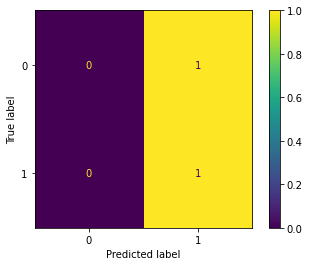

In [33]:
## applying logistic regression on tfidf_1500d on c=1
clf_model = LogisticRegression(C=1 , penalty = 'l2' , max_iter = 1000 , random_state = 4)
model.fit(x_train , y_train)
predicted_y = model.predict(x_test)
f1 = f1_score(y_test , predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(model,x_test,y_test , normalize = 'true' , labels = (0,1))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")
print("accuracy = ",accuracy_score(y_test , predicted_y , normalize = True)*100)

f1 score is 0.9143686502177069
accuracy 84.22459893048129
0 predicted -
1496 predicted +
236 original -
1260 original +


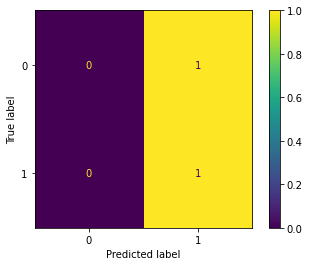

In [91]:
## applying logistic regression on tfidf_1500d on c=1
model = LogisticRegression(C=1 , penalty = 'l1' , max_iter = 1000 , random_state = 4 ,solver = 'liblinear')
model.fit(x_train , y_train)
predicted_y = model.predict(x_test)
f1 = f1_score(y_test , predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(model,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")

f1 score is 0.9175108538350216
accuracy 84.75935828877004
0 predicted -
1496 predicted +
228 original -
1268 original +
accuracy =  84.75935828877004


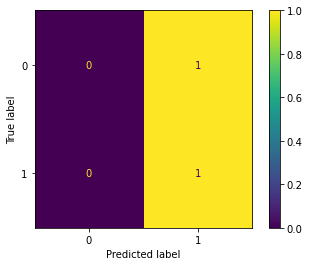

In [34]:
## applying logistic regression on tfidf_1500d on c=0.1
model = LogisticRegression(C=0.1 , penalty = 'l1' , max_iter = 1000 , random_state = 4 ,solver = 'liblinear')
model.fit(x_train , y_train)
predicted_y = model.predict(x_test)
f1 = f1_score(y_test , predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(model,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")
print("accuracy = ",accuracy_score(y_test , predicted_y , normalize = True)*100)

f1 score is 0.9143686502177069
accuracy 84.22459893048129
0 predicted -
1496 predicted +
236 original -
1260 original +


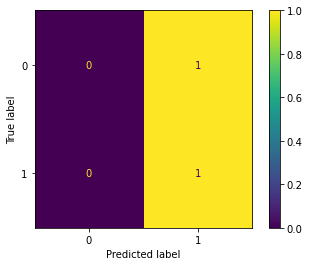

In [93]:
## applying logistic regression on tfidf_1500d on c=0.01
model = LogisticRegression(C=0.01 , penalty = 'l1' , max_iter = 1000 , random_state = 4 ,solver = 'liblinear')
model.fit(x_train , y_train)
predicted_y = model.predict(x_test)
f1 = f1_score(y_test , predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(model,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")

In [43]:
#### logisttic on tfidf bigram
model = TfidfVectorizer(ngram_range = (1,2))
tfidf_vectors = model.fit_transform(d_f["Cleaned_text"])
clf_model = LogisticRegression(C=1 , penalty = 'l1' , max_iter = 1000 , random_state = 4 ,solver = 'liblinear')
x = tfidf_vectors
y = d_f["Score"]
x_train,x_test,y_test,y_test = model_selection.train_test_split(x,y ,test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
clf_model.fit(x_train , y_train)
predicted_y = clf_model.predict(x_test)

(3490, 137847)
(1496, 137847)
(3490,)
(1496,)


In [44]:
print(type(predicted_y))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


f1 score is 0.9119999999999999
accuracy 83.82352941176471
0 predicted -
1496 predicted +
242 original -
1254 original +


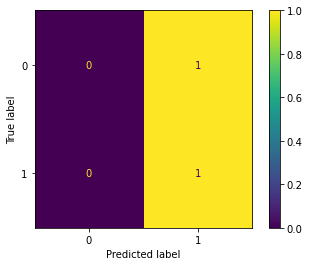

In [45]:
f1 = f1_score(y_test,predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(clf_model,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")

In [46]:
##### w2v
#### Word2vec

i=0
list_of_sentence = []
for sentence in tqdm(d_f["Cleaned_text"]):
    list_of_sentence.append(sentence.split())
w2v = Word2Vec(list_of_sentence , size= 50 , min_count = 5)
w2v_words = list(w2v.wv.vocab)
print(type(w2v_words))
print(len(w2v_words))

100%|███████████████████████████████████████████████████████████████████████████| 4986/4986 [00:00<00:00, 88224.03it/s]


<class 'list'>
3798


In [47]:
## average_w2v

total_vector = []
for sentance in list_of_sentence:
    sen_vector = np.zeros(50)
    count = 0
    for word in sentance:
        if word in w2v_words:
            count = count + 1
            sen_vector += w2v.wv[word]
        if count != 0:
            sen_vector = sen_vector/count
    total_vector.append(sen_vector)

In [48]:
print(len(total_vector))
print(len(total_vector[0]))

4986
50


In [49]:
x = np.asarray(total_vector)
y = d_f["Score"]
x_train,x_test,y_test,y_test = model_selection.train_test_split(x,y ,test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3490, 50)
(1496, 50)
(3490,)
(1496,)


f1 score is 0.9131856156919723
accuracy 84.02406417112299
0 predicted -
1496 predicted +
239 original -
1257 original +


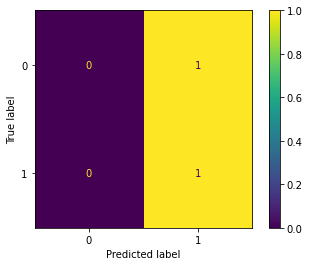

In [50]:
## applying logistic regression on average_w2v on c=1
clf_model = LogisticRegression(C=1 , penalty = 'l2' , max_iter = 100 , random_state = 4)
clf_model.fit(x_train , y_train)
predicted_y = clf_model.predict(x_test)
f1 = f1_score(y_test , predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(clf_model,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")

f1 score is 0.9131856156919723
accuracy 84.02406417112299
0 predicted -
1496 predicted +
239 original -
1257 original +


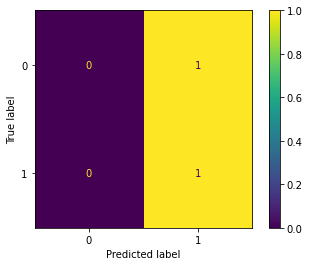

In [52]:
## applying logistic regression on average_w2v on c=5
clf_model = LogisticRegression(C=5 , penalty = 'l2' , max_iter = 100 , random_state = 4)
clf_model.fit(x_train , y_train)
predicted_y = clf_model.predict(x_test)
f1 = f1_score(y_test,predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(clf_model,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")

f1 score is 0.9123954925481643
accuracy 83.8903743315508
2 predicted -
1494 predicted +
239 original -
1257 original +


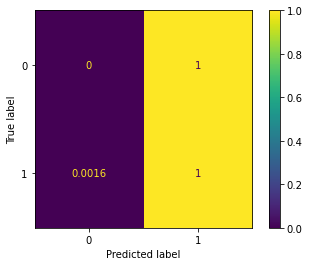

In [53]:
## applying logistic regression on average_w2v on c=4800
clf_model = LogisticRegression(C=4800 , penalty = 'l2' , max_iter = 1000 , random_state = 4)
clf_model.fit(x_train , y_train)
predicted_y = clf_model.predict(x_test)
f1 = f1_score(y_test,predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(clf_model,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")
##plot_confusion_matrix(clf_model , x_test , y_test , labels = (0,1),normalize = 'true')

In [54]:
print(np.count_nonzero(predicted_y==0))
print(np.count_nonzero(predicted_y==1))

2
1494


till now the best classification performance is shown by BOW so we we apply randomsearchcv on this 

In [222]:
#### BOW vectorisation
model = CountVectorizer(stop_words = 'english' , ngram_range = (1,2))
BOW_1500d = model.fit_transform(d_f["Cleaned_text"])
BOW_1500d.shape
x = BOW_1500d
y = d_f["Score"]
x_train, x_test , y_train ,y_test = model_selection.train_test_split(x,y,test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3490, 125765)
(1496, 125765)
(3490,)
(1496,)


In [188]:
##  applying randomsearchcv on this

In [189]:
logistic = LogisticRegression(solver = 'saga' , tol = 1e-2 , max_iter = 100 , random_state = 0)
distribution = dict(C = uniform(loc = 0 , scale = 4) , penalty = ['l2','l1'])

In [190]:
clf = RandomizedSearchCV(logistic , distribution , random_state = 0)
search = clf.fit(x_train , y_train)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

f1 score is 0.9312805107022155
accuracy 87.76737967914438
98 predicted -
1398 predicted +
231 original -
1265 original +


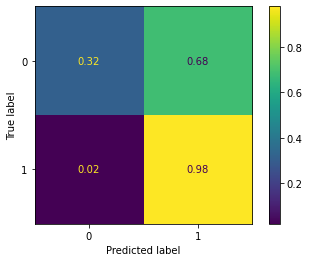

In [193]:
#### W calculation
logistic = LogisticRegression(solver = 'saga' , C = 2.17 ,tol = 1e-2 , max_iter = 100 , random_state = 0 ,penalty = 'l1')
logistic.fit(x_train , y_train)
predicted_y = logistic.predict(x_test)
f1 = f1_score(y_test,predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(logistic,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")

In [194]:
print(logistic.classes_)
print(logistic.coef_.shape)
print(np.count_nonzero(logistic.coef_!=0))
W = logistic.coef_
print(W[0:5])

[0 1]
(1, 125765)
21676
[[ 0.          0.          0.         ... -0.00142718  0.
   0.        ]]


In [195]:
#### adding a small noise to data_set and spectating the deviation in w
x = x_train.data + 0.00005
y = y_train

x = csr_matrix((x , x_train.indices , x_train.indptr) , shape= x_train.shape)  #### reshaping x with shapes of x_train

In [196]:
print(x.shape)
print(y.shape)

(3490, 125765)
(3490,)


f1 score is 0.9312805107022155
accuracy 87.76737967914438
98 predicted -
1398 predicted +
231 original -
1265 original +


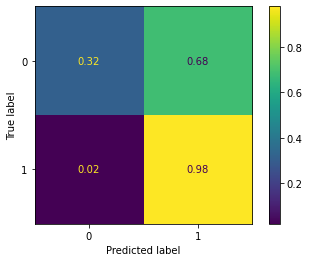

In [197]:
logistic = LogisticRegression(solver = 'saga' , C = 2.17 ,tol = 1e-2 , max_iter = 100 , random_state = 0 ,penalty = 'l1')
logistic.fit(x , y)
predicted_y = logistic.predict(x_test)
f1 = f1_score(y_test,predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(logistic,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")

In [198]:
W_dash = logistic.coef_
print(W_dash[0:5])

[[ 0.          0.          0.         ... -0.00142754  0.
   0.        ]]


In [199]:
print(W.shape)
print(W_dash.shape)

(1, 125765)
(1, 125765)


In [200]:
W =np.array( [i+0.0005 for i in W])
W_dash = np.array([i+0.0005 for i in W_dash])
print(W_dash[0:5])
print(W[0:5])

[[ 0.0005      0.0005      0.0005     ... -0.00092754  0.0005
   0.0005    ]]
[[ 0.0005      0.0005      0.0005     ... -0.00092718  0.0005
   0.0005    ]]


In [201]:
change = abs((W-W_dash)/(W))
percentage_change = change *100
print(percentage_change)
print(percentage_change[0])

[[0.        0.        0.        ... 0.0397667 0.        0.       ]]
[0.        0.        0.        ... 0.0397667 0.        0.       ]


In [202]:
for i in range(10,101,10):
    print("{}th percentile value is {}".format(i,np.percentile(percentage_change,i)))

10th percentile value is 0.0
20th percentile value is 0.0
30th percentile value is 0.0
40th percentile value is 0.0
50th percentile value is 0.0
60th percentile value is 0.0
70th percentile value is 0.0
80th percentile value is 0.0
90th percentile value is 0.009693864425335676
100th percentile value is 7.709125552738771


In [203]:
for i in range(90,101,1):
    print("{}th percentile value is {}".format(i,np.percentile(percentage_change,i)))

90th percentile value is 0.009693864425335676
91th percentile value is 0.010911882056744461
92th percentile value is 0.012232055916106195
93th percentile value is 0.01382641039194492
94th percentile value is 0.016212200598158994
95th percentile value is 0.02091761583864046
96th percentile value is 0.02616949681540366
97th percentile value is 0.036843185158170796
98th percentile value is 0.05738494492196852
99th percentile value is 0.10250126023913812
100th percentile value is 7.709125552738771


In [204]:
for i in range(1,11):
    print("{}th percentile value is {}".format(99+(i*0.1),np.percentile(percentage_change,99+(i*0.1))))

99.1th percentile value is 0.1083426078457734
99.2th percentile value is 0.11637608131820691
99.3th percentile value is 0.15513007922068395
99.4th percentile value is 0.18624813589238254
99.5th percentile value is 0.22692018621214388
99.6th percentile value is 0.2845285489677138
99.7th percentile value is 0.5137744902185598
99.8th percentile value is 1.250820101856123
99.9th percentile value is 1.6061159436291679
100.0th percentile value is 7.709125552738771


# here i see an steep increase from 99.8 percentile so t means that after that W follows multicolinearity.we will try to remove that features

In [228]:
change = percentage_change.reshape(-1,1)    #### this line converts the gievn array to a column vector
feature = model.get_feature_names()
##pertub_df = pd.DataFrame(change , columns = ["change"] , index = feature )

In [234]:
two_d = np.vstack((percentage_change,feature)).T

In [235]:
print(two_d.shape)

(125765, 2)


In [238]:
d_f3 = pd.DataFrame(data = two_d , columns = ("change" , "feature") )

In [240]:
print(d_f3.tail(5))

                     change          feature
125760                  0.0  zucchini update
125761  0.03976670499083123            zupas
125762  0.03976670499083123   zupas pathetic
125763                  0.0            zuppa
125764                  0.0  zuppa engelesia


In [243]:
d_f3 = d_f3[d_f3["change"]< "0.5137744902185598"]

In [250]:
len(d_f3)

125041

In [254]:
###  training clf_model again after removing multicolinearity

In [252]:
idx = len(d_f3)
x = BOW_1500d [:,:idx]
y = d_f["Score"]
x_train , x_test , y_train , y_test = model_selection.train_test_split(x , y , test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3490, 125041)
(1496, 125041)
(3490,)
(1496,)


f1 score is 0.9278350515463918
accuracy 87.3663101604278
116 predicted -
1380 predicted +
257 original -
1239 original +


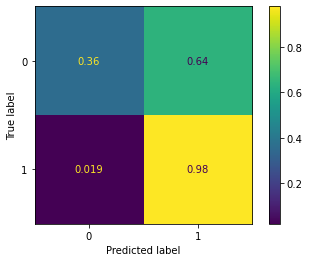

In [255]:
logistic = LogisticRegression(solver = 'saga' , C = 2.17 ,tol = 1e-2 , max_iter = 100 , random_state = 0 ,penalty = 'l1')
logistic.fit(x_train, y_train)
predicted_y = logistic.predict(x_test)
f1 = f1_score(y_test,predicted_y)
print("f1 score is",f1)
plot_confusion_matrix(logistic,x_test,y_test , normalize = 'true' , labels = (0,1))
print("accuracy",accuracy_score(y_test , predicted_y ,normalize = True)*float(100))
print(np.count_nonzero(predicted_y==0),"predicted -")
print(np.count_nonzero(predicted_y==1),"predicted +")
print(np.count_nonzero(y_test==0),"original -")
print(np.count_nonzero(y_test==1),"original +")

In [258]:
top_feature = d_f3.sort_values(ascending = True ,by = 'change').head(10)
bottom_feature = d_f3.sort_values(ascending = False , by = 'change').head(10)

In [259]:
top_feature

,change,feature
0,0.0,aahhhs
80000,0.0,pediatrics pages
79999,0.0,pediatrics expert
79998,0.0,pediatrics
79997,0.0,pediatrician started
79996,0.0,pediatrician recommended
79995,0.0,pediatrician
79994,0.0,pediatric nutrition
79993,0.0,pediatric
79992,0.0,pedialyte electrolytes


In [260]:
bottom_feature

,change,feature
46917,0.5103990449629681,glue
21819,0.47772166797470306,coffee want
48908,0.47577289313962734,granulated
81949,0.46494351050995353,plasticy
32271,0.46494351050995353,distinct plasticy
76182,0.4450679348798118,opposite
103767,0.44170579211638106,stands
43044,0.43979713220274796,food amazon
84976,0.4225553261651755,price unit
121267,0.42116524487098783,warehouse deals
